In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [7]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

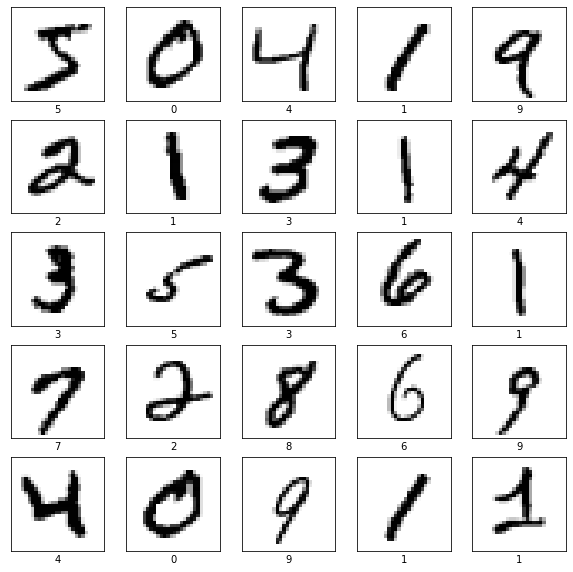

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [32]:
nb_classes = len(set(y_train))

model = Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(128, activation='relu'),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(32, activation='relu'),
  Dropout(0.2),
  Dense(nb_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [18]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.28130051,  0.20847604,  0.03922432,  0.09864812,  0.03623736,
        -0.03888116, -0.0889548 , -0.14671242,  0.0058768 ,  0.33546662]],
      dtype=float32)

In [19]:
tf.nn.softmax(predictions).numpy()

array([[0.1217469 , 0.11319589, 0.09557087, 0.10142218, 0.09528583,
        0.08839034, 0.08407329, 0.07935499, 0.09243637, 0.12852332]],
      dtype=float32)

In [33]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
# Train
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  min_delta=0.01, 
                                                  patience=3)
# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath="model_checkpoints/",
#                                                 save_weights_only=True,
#                                                 monitor='accuracy',
#                                                 mode='max',
#                                                 save_best_only=True)

history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    batch_size=128, 
                    validation_split=0.3,
                    # callbacks=[early_stopping]
                    ) #, checkpoint

Epoch 1/100
329/329 [==============================] - 1s 3ms/step - loss: 0.6980 - accuracy: 0.7808 - val_loss: 0.2335 - val_accuracy: 0.9312
Epoch 2/100
329/329 [==============================] - 1s 3ms/step - loss: 0.2886 - accuracy: 0.9193 - val_loss: 0.1563 - val_accuracy: 0.9533
Epoch 3/100
329/329 [==============================] - 1s 2ms/step - loss: 0.2166 - accuracy: 0.9390 - val_loss: 0.1373 - val_accuracy: 0.9599
Epoch 4/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1759 - accuracy: 0.9504 - val_loss: 0.1244 - val_accuracy: 0.9642
Epoch 5/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1488 - accuracy: 0.9578 - val_loss: 0.1201 - val_accuracy: 0.9664
Epoch 6/100
329/329 [==============================] - 1s 2ms/step - loss: 0.1311 - accuracy: 0.9642 - val_loss: 0.1158 - val_accuracy: 0.9687
Epoch 7/100
329/329 [==============================] - 1s 3ms/step - loss: 0.1206 - accuracy: 0.9669 - val_loss: 0.1127 - val_accuracy: 0.9686

In [35]:
# Evaluate
evaluation = model.evaluate(x_test, y_test)
print('Summary: Loss over the test dataset: %.2f, Accuracy: %.2f' % (evaluation[0], evaluation[1]))

313/313 [==============================] - 0s 972us/step - loss: 0.1097 - accuracy: 0.9807
Summary: Loss over the test dataset: 0.11, Accuracy: 0.98


<AxesSubplot:>

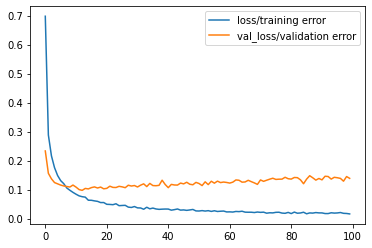

In [36]:
x = np.arange(len(history.history['loss']))

sns.lineplot(x = x, 
             y = history.history['loss'],
             label = "loss/training error")

sns.lineplot(x = x, 
             y = history.history['val_loss'],
             label = "val_loss/validation error")

<AxesSubplot:>

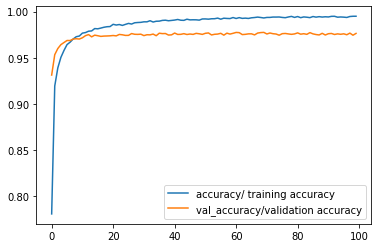

In [37]:
x = np.arange(len(history.history['accuracy']))

sns.lineplot(x = x, 
             y = history.history['accuracy'],
             label = "accuracy/ training accuracy")

sns.lineplot(x = x, 
             y = history.history['val_accuracy'],
             label = "val_accuracy/validation accuracy")

In [38]:
predictions = model(x_test[:1]).numpy()
predictions

array([[-14.26829  , -11.285513 ,  -5.418706 , -10.205147 , -10.128488 ,
        -12.269221 , -42.854683 ,  21.266346 , -17.143148 ,  -5.2028284]],
      dtype=float32)

In [39]:
tf.nn.softmax(predictions).numpy()

array([[3.6940523e-16, 7.2930316e-15, 2.5753106e-12, 2.1483466e-14,
        2.3195162e-14, 2.7270164e-15, 1.4209843e-28, 1.0000000e+00,
        2.0843438e-17, 3.1958327e-12]], dtype=float32)

In [42]:
probability_model = Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 10)                111146    
                                                                 
 softmax_2 (Softmax)         (None, 10)                0         
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [43]:
predictions = probability_model(x_test)
predictions[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([3.6940663e-16, 7.2930316e-15, 2.5753106e-12, 2.1483547e-14,
       2.3195162e-14, 2.7270268e-15, 1.4209843e-28, 1.0000000e+00,
       2.0843438e-17, 3.1958327e-12], dtype=float32)>

In [45]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

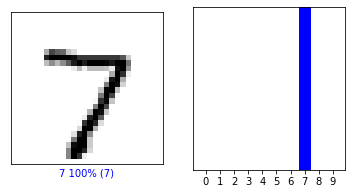

In [46]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], y_test)
plt.show()

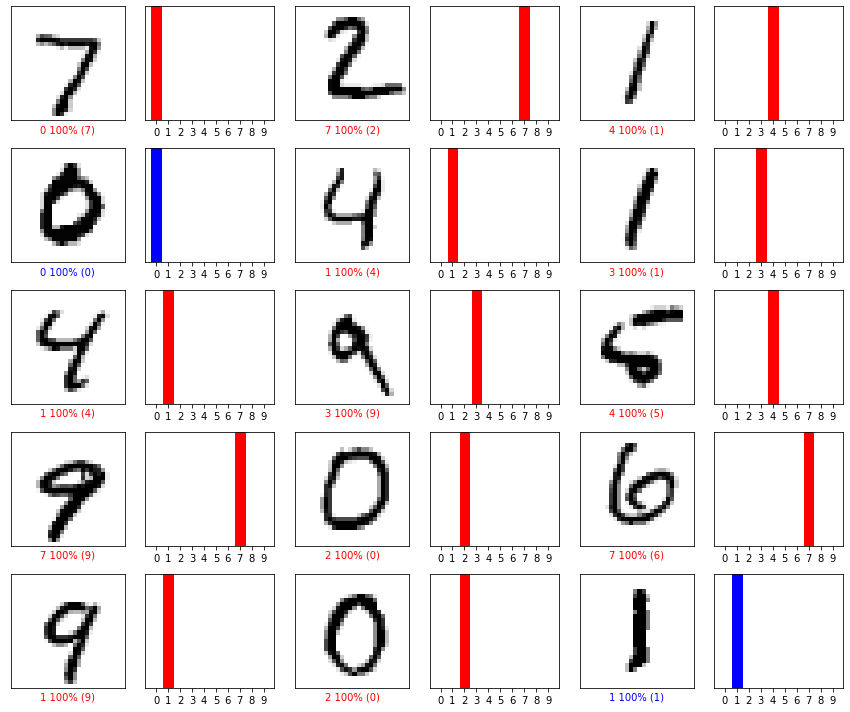

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plus = 25
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i+plus],  y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i+plus], y_test)
plt.tight_layout()
plt.show()